# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Data

In [2]:
housing = pd.DataFrame(pd.read_csv("Downloads/Housing.csv"))

In [3]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Inspection

In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [7]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

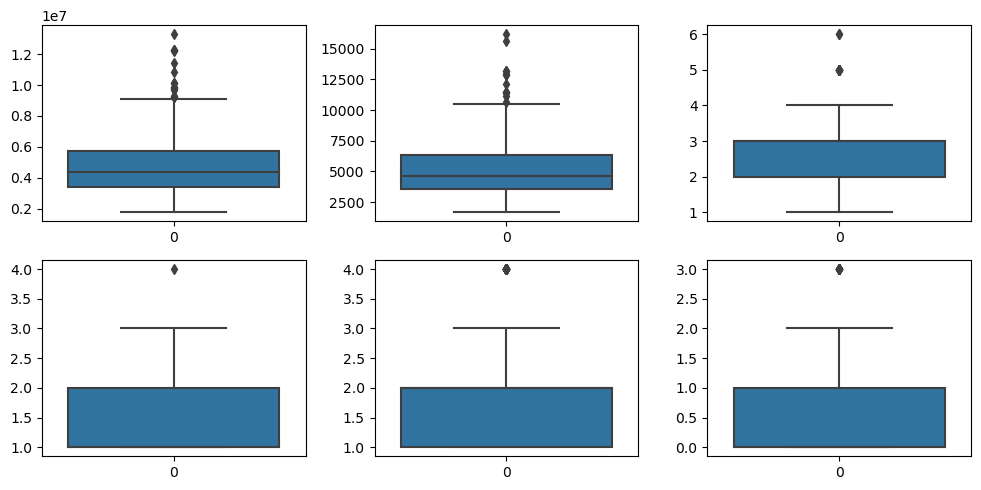

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

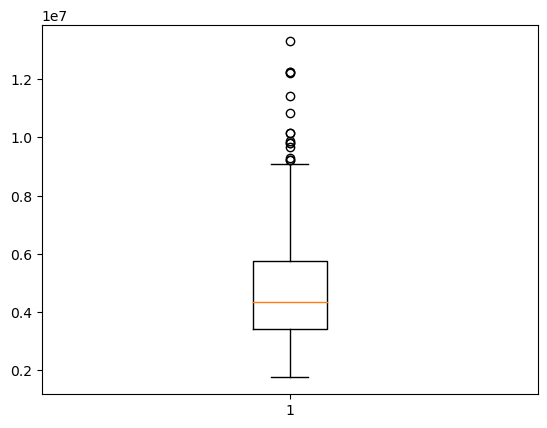

In [9]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

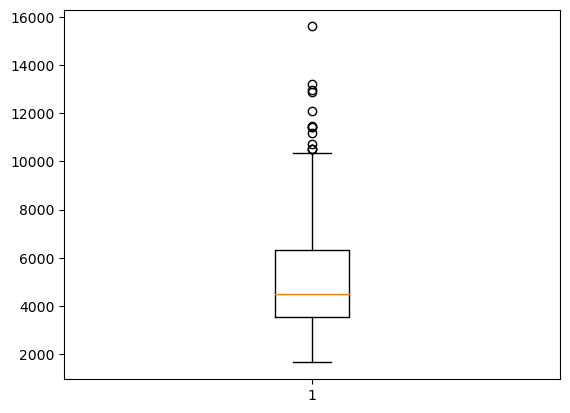

In [10]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

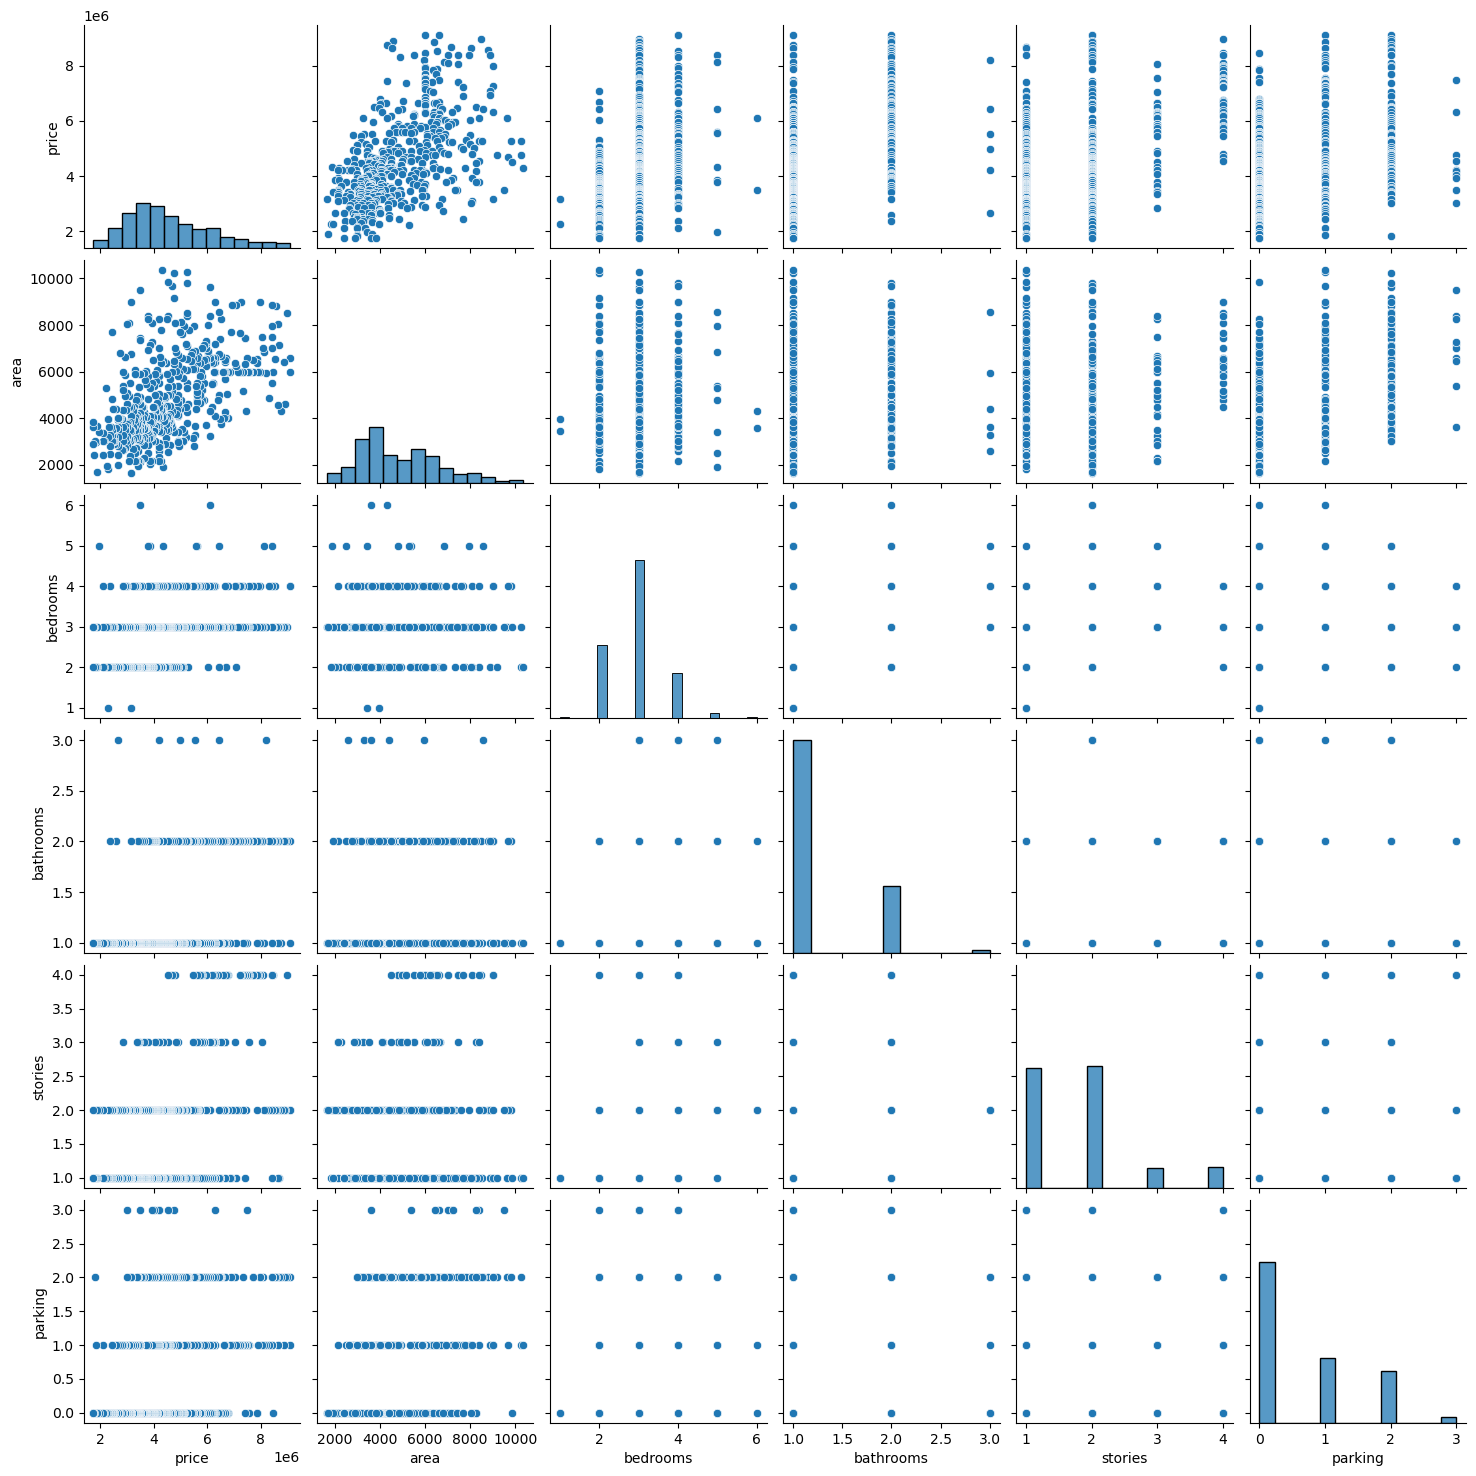

In [11]:
sns.pairplot(housing)
plt.show()

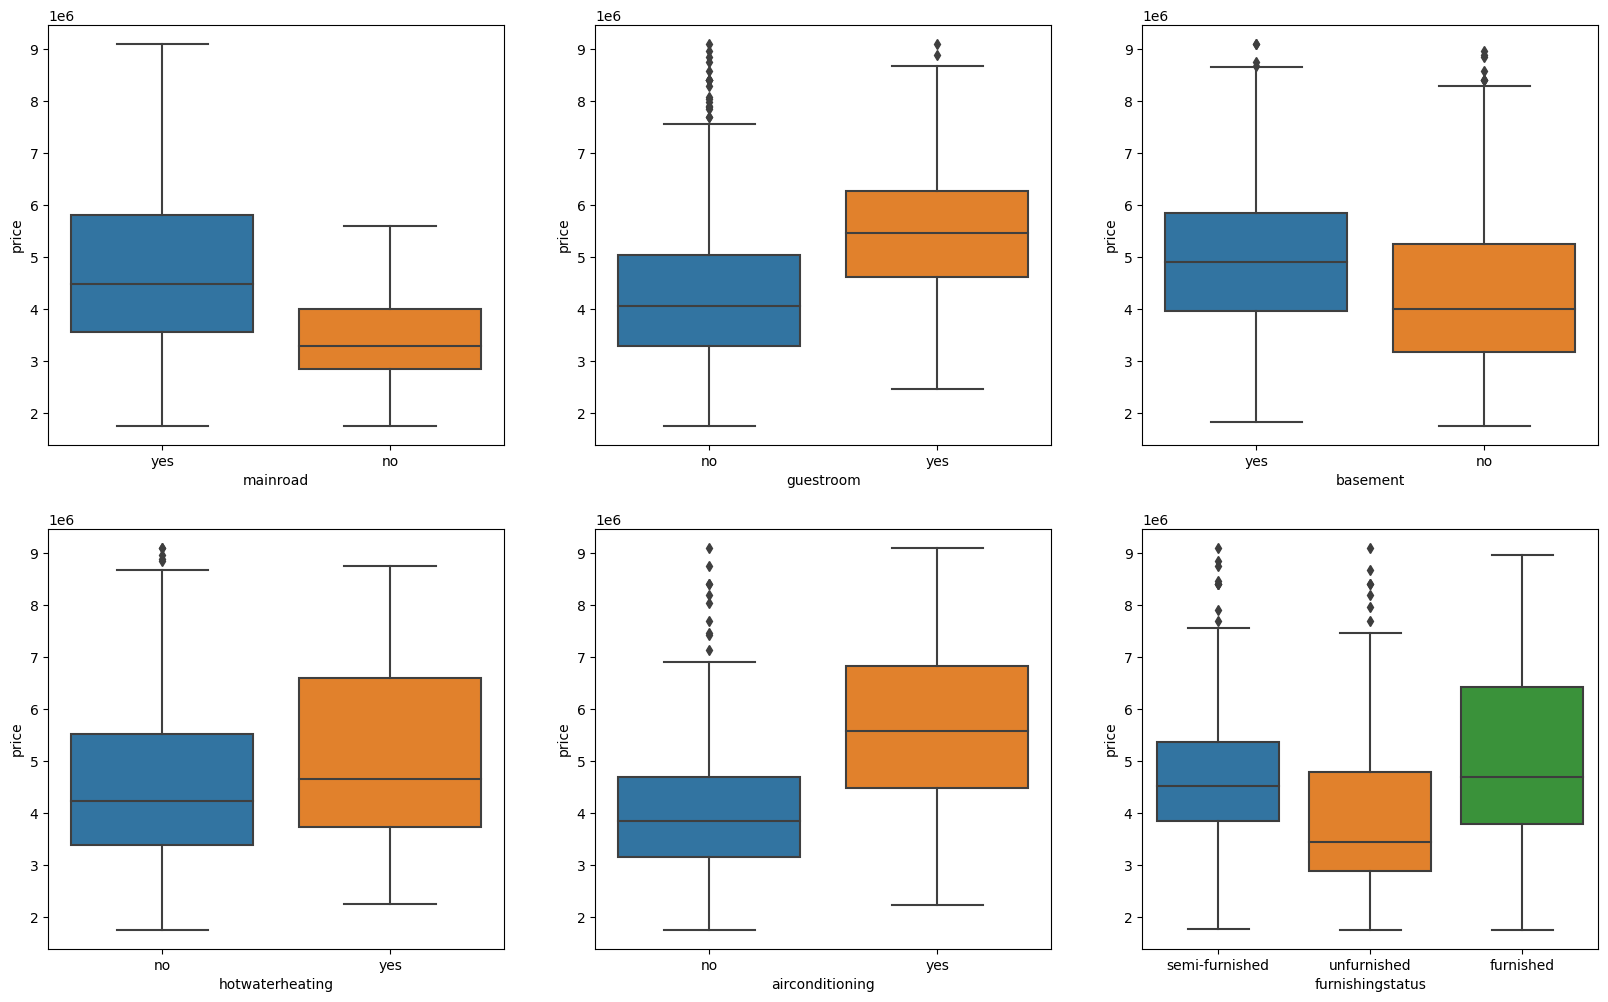

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

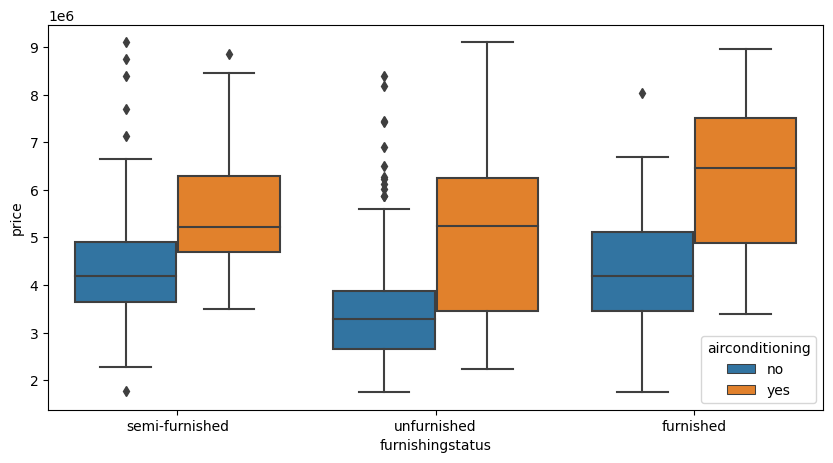

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# Data Preparation

In [14]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [15]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [16]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [17]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [18]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [19]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [20]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [21]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


# Splitting the data

In [23]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

# Scale the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Convert categorical variables to binary variables
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'semi-furnished', 'unfurnished']
df_train = pd.get_dummies(df_train, columns=cat_vars, drop_first=True)


In [24]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,prefarea_1,semi-furnished_1,unfurnished_1
148,0.523810,0.526907,0.4,0.0,0.666667,0.000000,1,0,0,0,0,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,0.000000,1,1,1,0,0,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0.333333,0,0,1,0,1,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,0.666667,1,0,1,0,0,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0.333333,0,1,0,0,0,0,0,1


In [25]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,prefarea_1,semi-furnished_1,unfurnished_1
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.218837,0.875346,0.168975,0.349030,0.038781,0.313019,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.287286,0.330784,0.375250,0.477325,0.193341,0.464366,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


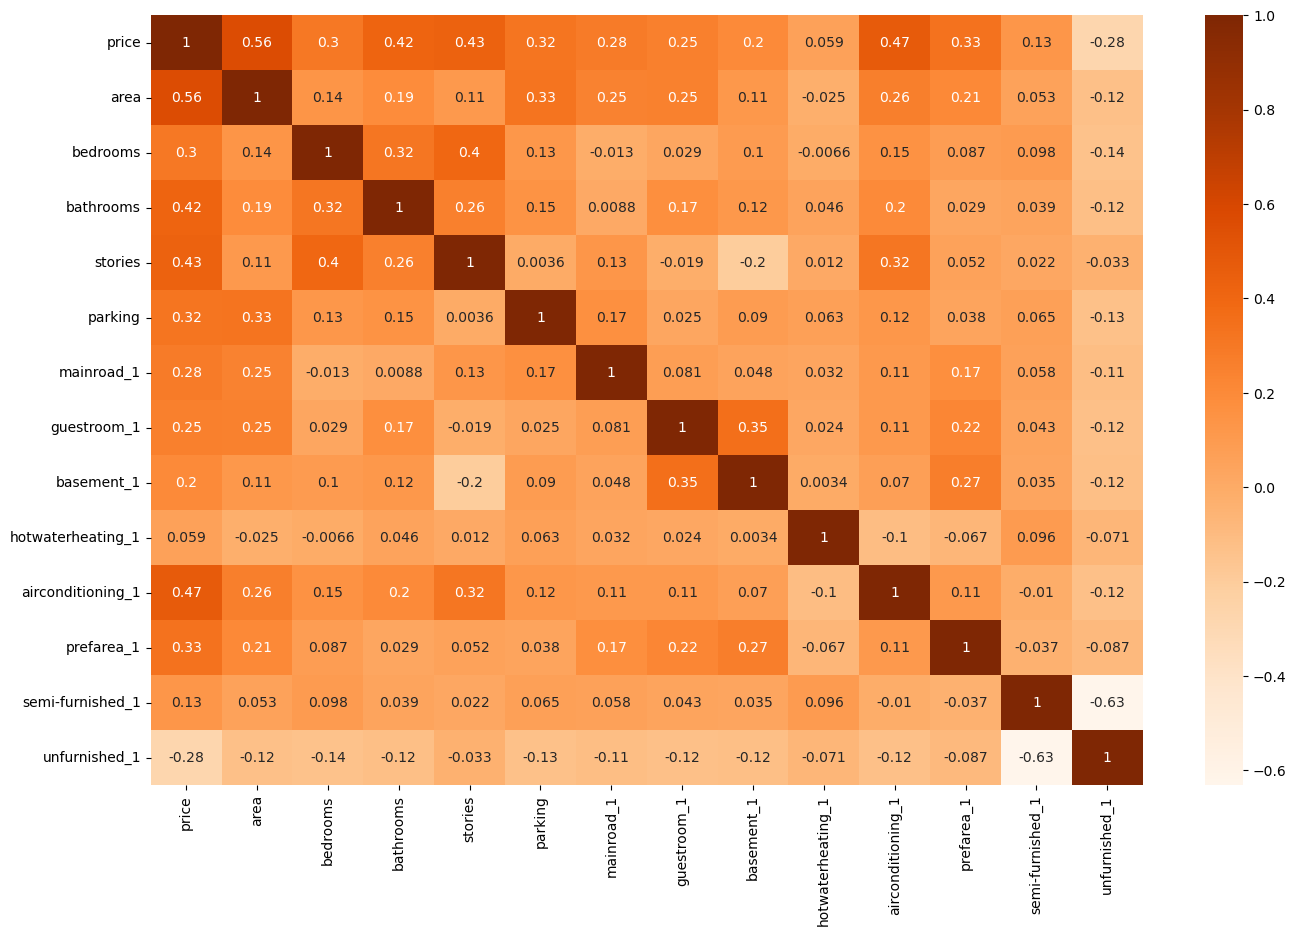

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Oranges")
plt.show()

In [27]:
# Build the model
import statsmodels.api as sm
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()

# Print the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     49.95
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.56e-71
Time:                        19:36:52   Log-Likelihood:                 242.54
No. Observations:                 361   AIC:                            -457.1
Df Residuals:                     347   BIC:                            -402.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0851      0.03

In [28]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif)

             Features   VIF
0                area  5.01
1            bedrooms  7.40
2           bathrooms  1.63
3             stories  2.78
4             parking  1.87
5          mainroad_1  6.31
6         guestroom_1  1.51
7          basement_1  2.03
8   hotwaterheating_1  1.08
9   airconditioning_1  1.81
10         prefarea_1  1.49
11   semi-furnished_1  2.79
12      unfurnished_1  1.98


In [29]:
# Make predictions on the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test = pd.get_dummies(df_test, columns=cat_vars, drop_first=True)
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)


In [30]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.658863188929075
RMSE: 0.1360287635567744


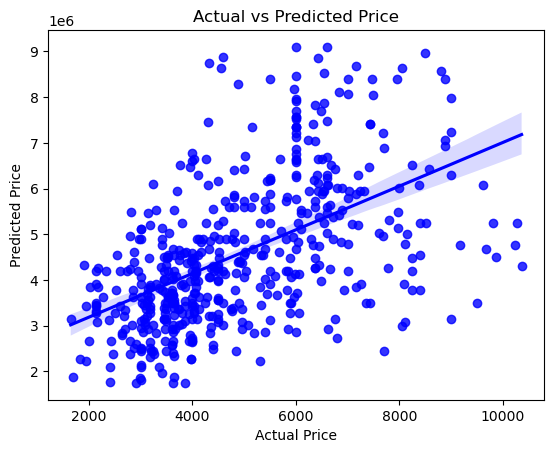

In [31]:
# Visualize the predicted vs actual prices
sns.regplot(x='area', y='price', data=housing, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()
